In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_excel(r"C:\Users\USER\Downloads\iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Finding duplicates and removing them

In [7]:
data.duplicated().sum()

3

In [8]:
data=data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [12]:
#To find missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

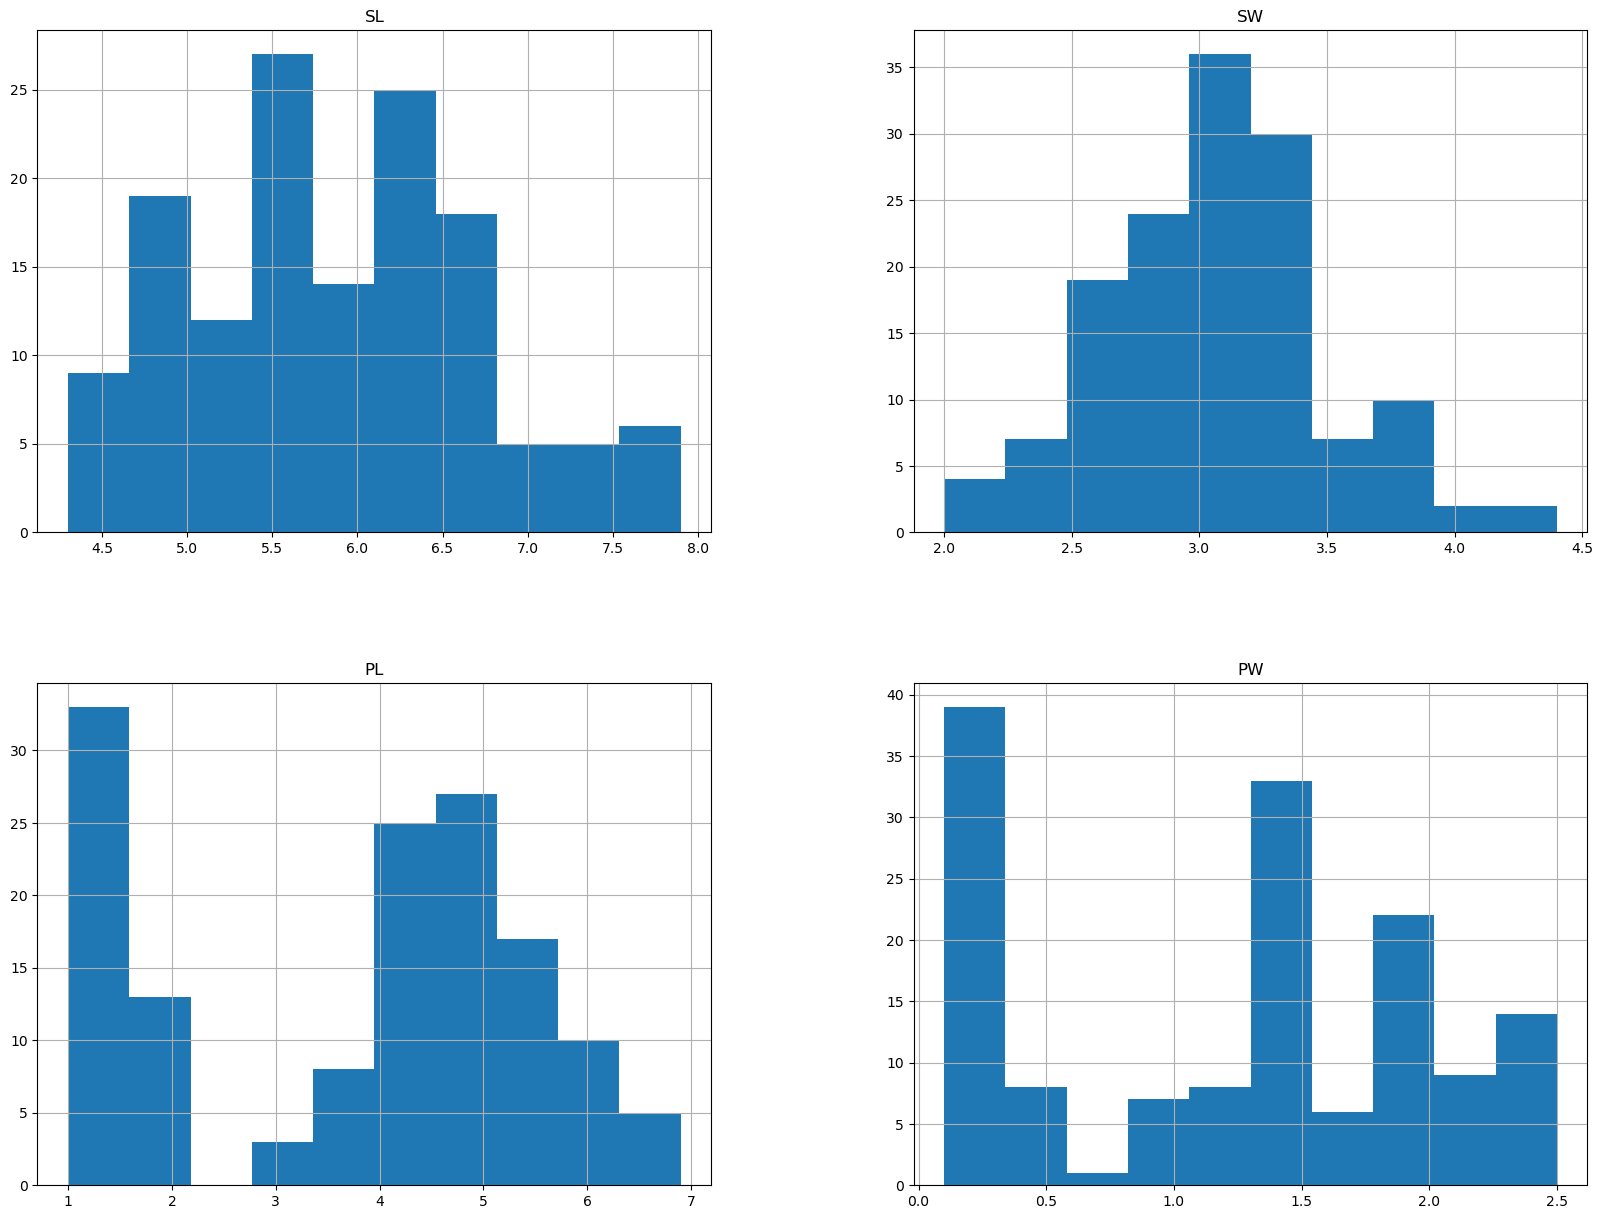

In [14]:
#Treating missing values
#Plotting histogram to know whether the graph is normal or skewed so that we can replace them with mean or median
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [16]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [17]:
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [18]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [93]:
data.corr(method='pearson')

,SL,SW,PL,PW,Classification
SL,1.000000,-0.098635,0.828716,0.799399,0.774153
SW,-0.098635,1.000000,-0.366797,-0.298731,-0.368385
PL,0.828716,-0.366797,1.000000,0.934041,0.925788
PW,0.799399,-0.298731,0.934041,1.000000,0.955693
Classification,0.774153,-0.368385,0.925788,0.955693,1.000000


<AxesSubplot:>

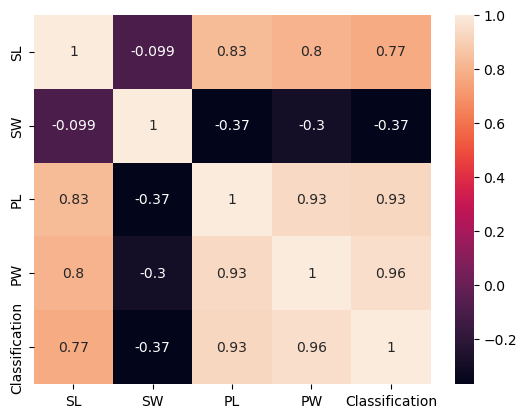

In [95]:
sns.heatmap(data.corr(method='pearson'),annot=True)

# Encoding

In [19]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,4.4,2.0
148,6.2,3.4,5.4,2.3


In [20]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [21]:
org_data=data.copy()

In [22]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Box Plot

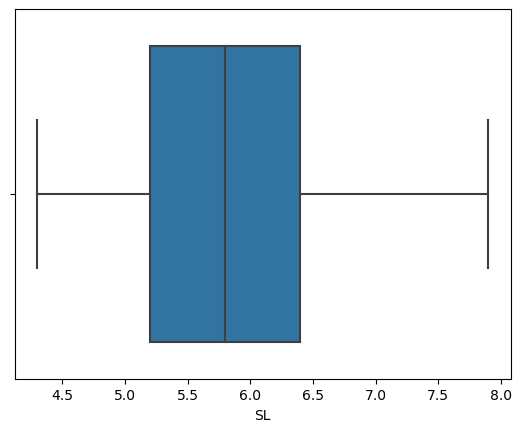

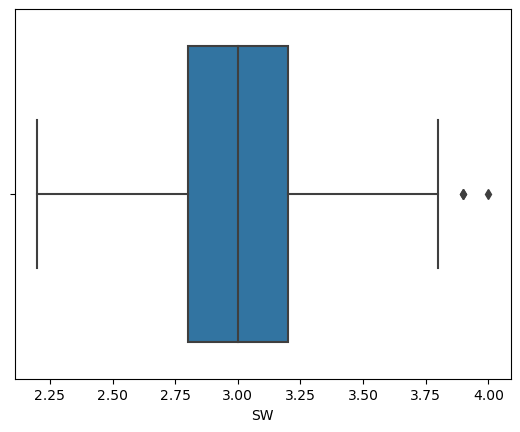

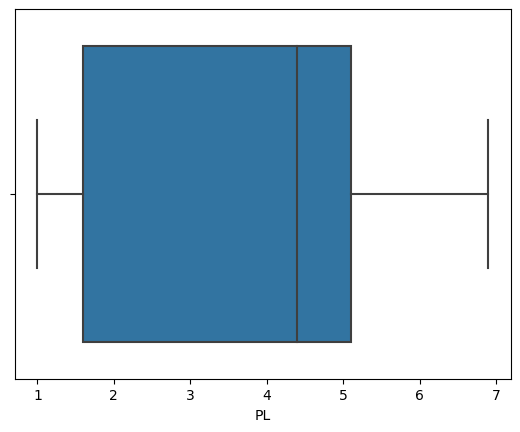

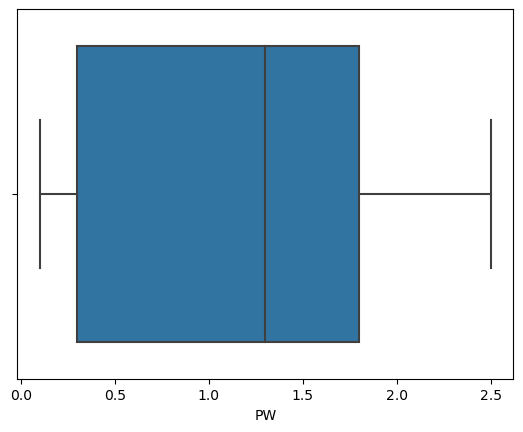

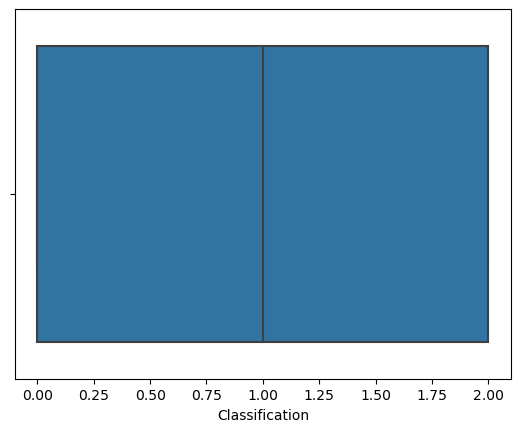

In [98]:
#outlier detection
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

Outlier found in SW

In [24]:
#treating outliers
IQR =stats.iqr(data.SW,interpolation='midpoint')
IQR

0.5

In [25]:
Q1=data.SW.quantile(0.25)
Q3=data.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.05, 4.05)

In [27]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,1


In [28]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [29]:
data.loc[data['SW']>max_limit,'SW']=np.median(data.SW)
data.loc[data['SW']<min_limit,'SW']=np.median(data.SW)

In [30]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification


In [31]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification


In [33]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Dividing data into predictor and target

In [34]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [35]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='lbfgs',max_iter=400)

In [39]:
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

In [40]:
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [41]:
y_test

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
Name: Classification, dtype: int32

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [49]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [50]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9333333333333333


# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
metric_k=[]
neighbors= np.arange(3,15)

In [92]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)
    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [88]:
metric_k

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

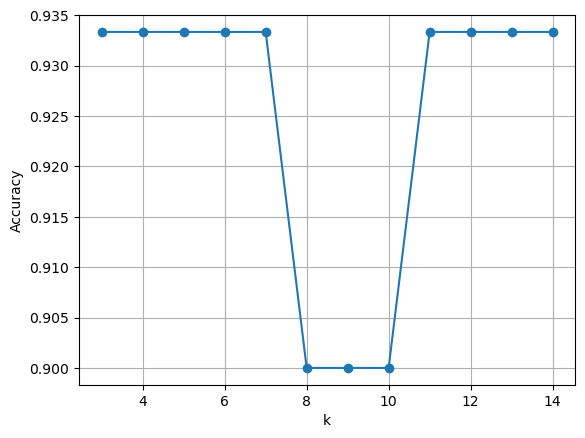

In [89]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [90]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,pos_label='positive',average='micro'))
print('Recall=',recall_score(y_test,y_predictions,pos_label='positive',average='micro'))
print('F1 Score=',f1_score(y_test,y_predictions,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.9333333333333333
Precision= 0.9333333333333333
Recall= 0.9333333333333333
F1 Score= 0.9333333333333333


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

# SVM

In [66]:
from sklearn.svm import SVC

In [67]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [68]:
y_pred_svm=svm_cls.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [70]:
confusion_matrix(y_test,y_pred_svm)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

In [72]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)

In [73]:
y_pred_svm=svm_cls1.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
confusion_matrix(y_test,y_pred_svm)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  7]], dtype=int64)

In [76]:
accuracy_score(y_test,y_pred_svm)

0.9

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [78]:
confusion_matrix(y_test,y_pred_dt)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred_dt)

0.9333333333333333

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_cls= RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [81]:
confusion_matrix(y_test,y_pred_rf)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred_rf)

0.9333333333333333

# Conclusion

From all models analysed above, we got SVM classifier model is the best model, since it gives an accuracy score of about 0.967 which is higher than the accuracy score of other models